In [1]:
import sys
sys.path.append('../')
from config import configuration
config = configuration()
config.request_password()

 ·············


In [2]:
import sqlutilpy
ogle4_rrl=pd.DataFrame(sqlutilpy.get('''select * from ogle4_rrl_bulge_disc''', 
                                     **config.wsdb_kwargs))
from astropy.coordinates import SkyCoord
import astropy.units as u
ogle_skycoord = SkyCoord(ra=ogle4_rrl['ra']*u.deg, dec=ogle4_rrl['decl']*u.deg, 
                         frame='icrs').transform_to('galactic')


In [3]:
np.count_nonzero(((ogle_skycoord.l.deg<10.)|(ogle_skycoord.l.deg>350.))&(ogle_skycoord.b.deg>-10.)&(ogle_skycoord.b.deg<5.))

44183

In [4]:
vvv_rrl=pd.DataFrame(sqlutilpy.get("""select * from jason_sanders.virac2_variables""", 
                                     **config.wsdb_kwargs))

In [5]:
len(vvv_rrl), len(ogle4_rrl)

(1364732, 126146)

Text(0.5, 1.0, 'VVV Prob>0.9')

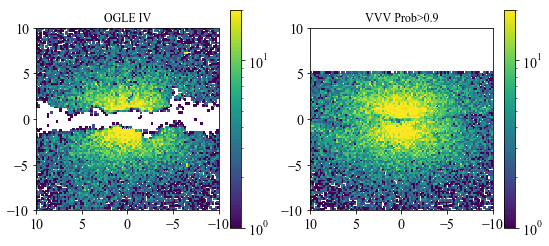

In [6]:
f,a=plt.subplots(1,2,figsize=[9.,4.])
plt.sca(a[0])
fltr = (ogle4_rrl['type']=='RRab')
plt.hist2d((ogle_skycoord.l.deg-360.*(ogle_skycoord.l.deg>180.))[fltr], 
           ogle_skycoord.b.deg[fltr], range=[[-10,10],[-10,10]],
           bins=100,vmax=20,norm=LogNorm())
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.gca().invert_xaxis()
plt.gca().set_aspect('equal')
plt.colorbar()
plt.title('OGLE IV')
plt.sca(a[1])
fltr = (vvv_rrl['prob']>0.4)&(vvv_rrl['class']=='RRab')
plt.hist2d((vvv_rrl['l']-360.*(vvv_rrl['l']>180.))[fltr], 
           vvv_rrl['b'][fltr], range=[[-10,10],[-10,10]],
           bins=100,vmax=20,norm=LogNorm())
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.gca().invert_xaxis()
plt.colorbar()
plt.gca().set_aspect('equal')
plt.title('VVV Prob>0.9')

In [7]:
import sys
sys.path.append('../../../../')
from virac_utils import cm_virac
ogle4_v_match=cm_virac(ogle4_rrl, 
                       radeccols=['ra', 'decl'], 
                       use_pm=True, cm_radius=0.4, 
                       epoch=2000.)

/data/jls/python3.5/site-packages/sqlutilpy/sqlutil.py:398: UserWarning: Column name sourceid is repeated in the output, new name sourceid_1 assigned
  'new name %s assigned') % (_n, curn))
/data/jls/python3.5/site-packages/sqlutilpy/sqlutil.py:398: UserWarning: Column name l is repeated in the output, new name l_1 assigned
  'new name %s assigned') % (_n, curn))
/data/jls/python3.5/site-packages/sqlutilpy/sqlutil.py:398: UserWarning: Column name b is repeated in the output, new name b_1 assigned
  'new name %s assigned') % (_n, curn))


/data/jls/python3.5/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/data/jls/python3.5/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


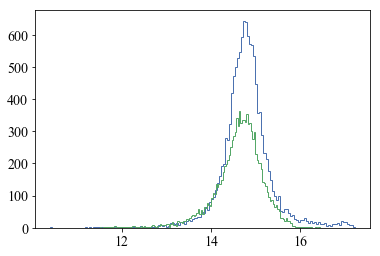

In [9]:
fltr = ((ogle4_rrl['type']=='RRc')|(ogle4_rrl['type']=='RRd'))&(
    (ogle_skycoord.l.deg<10.)|(ogle_skycoord.l.deg>350.))&(ogle_skycoord.b.deg>-10.)&(ogle_skycoord.b.deg<5.)

plt.hist(ogle4_v_match['ks_b_ivw_mean_mag'][fltr],bins=150,histtype='step');
fltr = (vvv_rrl['class']=='RRcd')&(vvv_rrl['prob']>0.5)&((vvv_rrl['l']<10)|(vvv_rrl['l']>350.))
plt.hist(vvv_rrl['ks_ivw_mean_mag'][fltr],bins=150,histtype='step');

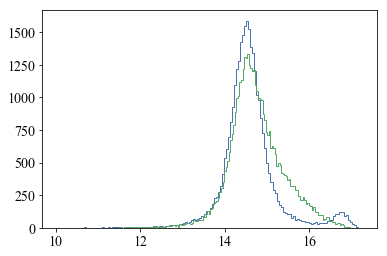

In [10]:
fltr = (ogle4_rrl['type']=='RRab')&(
    (ogle_skycoord.l.deg<10.)|(ogle_skycoord.l.deg>350.))&(ogle_skycoord.b.deg>-10.)&(ogle_skycoord.b.deg<5.)

plt.hist(ogle4_v_match['ks_b_ivw_mean_mag'][fltr],bins=150,histtype='step');
fltr = (vvv_rrl['class']=='RRab')&(vvv_rrl['prob']>0.5)&((vvv_rrl['l']<10)|(vvv_rrl['l']>350.))
plt.hist(vvv_rrl['ks_ivw_mean_mag'][fltr],bins=150,histtype='step');

In [11]:
fltr = (ogle4_rrl['type']=='RRab')&(
    (ogle_skycoord.l.deg<10.)|(ogle_skycoord.l.deg>350.))&(ogle_skycoord.b.deg>-10.)&(ogle_skycoord.b.deg<5.)

np.count_nonzero((ogle4_v_match['sourceid']>0)&fltr)/np.count_nonzero(fltr)

0.984638477261114

In [34]:
c = SkyCoord(ra=(vvv_rrl['ra'].values*u.degree-15.*u.yr*vvv_rrl['pmra'].values*u.mas/u.yr/np.cos(np.deg2rad(vvv_rrl['dec'].values))), 
             dec=(vvv_rrl['dec'].values*u.degree-15.*u.yr*vvv_rrl['pmdec'].values*u.mas/u.yr),frame='icrs')
catalog = SkyCoord(ra=ogle4_rrl['ra'].values*u.deg, dec=ogle4_rrl['decl'].values*u.deg,frame='icrs')
idx, d2d, d3d = c.match_to_catalog_sky(catalog)
idx_ogle, d2d_ogle, d3d_ogle = catalog.match_to_catalog_sky(c)

In [35]:
len(d2d),len(vvv_rrl)

(2136376, 2136376)

In [14]:
def vertical_density_plot():
    # fltr = (vvv_rrl['class']=='RRab')&(vvv_rrl['prob']>0.)&((vvv_rrl['l']<10)|(vvv_rrl['l']>350.))
    # plt.hist(vvv_rrl['b'][fltr],bins=150,range=[-10,5],histtype='step',
    #         weights=1./np.interp(vvv_rrl['ks_ivw_mean_mag'][fltr],
    #                              incomplete_full[0],incomplete_full[1]));
    pcut=0.9
    fltr = (ogle4_v_match['sourceid']>0)
    # fltr = ((ogle_skycoord.l.deg<10.)|(ogle_skycoord.l.deg>350.))&(ogle_skycoord.b.deg>-10.)&(ogle_skycoord.b.deg<5.)
    fltr &= ((d2d_ogle.arcsec<0.4)
                     &(ogle4_rrl['type']=='RRab')
                     &(vvv_rrl['class'].values[idx_ogle]=='RRab')
                     &(vvv_rrl['prob'].values[idx_ogle]>pcut))
    bbb = np.nanpercentile(ogle4_v_match['ks_b_ivw_mean_mag'].values[fltr],
                               np.linspace(0.,100.,100))
    nn2,bb2=np.histogram(ogle4_v_match['ks_b_ivw_mean_mag'].values[fltr],range=[11,18],
             bins=bbb);

    fltr = (ogle4_v_match['sourceid']>0)
    # fltr = ((ogle_skycoord.l.deg<10.)|(ogle_skycoord.l.deg>350.))&(ogle_skycoord.b.deg>-10.)&(ogle_skycoord.b.deg<5.)
    fltr &= (ogle4_rrl['type']=='RRab')
    nn,bb=np.histogram(ogle4_v_match['ks_b_ivw_mean_mag'].values[fltr],
             range=[11,18],
             bins=bbb);
    incomplete = .5*(bb[1:]+bb[:-1]),nn2/nn


    fltr = (vvv_rrl['class']=='RRab')&(vvv_rrl['prob']>pcut)&((vvv_rrl['l']<10)|(vvv_rrl['l']>350.))
#     fltr &= (vvv_rrl['l']>3)&(vvv_rrl['l']<7)
    fltr &= (vvv_rrl['ks_ivw_mean_mag']<16.)
    plt.hist(vvv_rrl['b'][fltr],bins=150,range=[-10,10],histtype='step',
            weights=1./np.interp(vvv_rrl['ks_ivw_mean_mag'][fltr],
                                 incomplete[0],incomplete[1]),
            label='C.C. VVV\nRRab $p>0.9$',color='gray',lw=1.5);


    fltr = (ogle4_rrl['type']=='RRab')&(
        (ogle_skycoord.l.deg<10.)|(ogle_skycoord.l.deg>350.))&(ogle_skycoord.b.deg>-10.)&(ogle_skycoord.b.deg<10.)
#     fltr &= (ogle_skycoord.l.deg>3)&(ogle_skycoord.l.deg<7)
    fltr &= (ogle4_v_match['ks_b_ivw_mean_mag']<16.)
    
    plt.hist(ogle_skycoord.b.deg[fltr],bins=150,range=[-10,10],histtype='step',
            label='OGLE RRab',color=sns.color_palette()[0],lw=1.5);
    # plt.hist(ogle_skycoord.b.deg[fltr&(ogle4_v_match['sourceid_1']>0)],
    #          bins=150,range=[-10,5],histtype='step');
    plt.xlim(-10,10)
    plt.xlabel(r'Galactic latitude [deg]')
    plt.ylabel('Counts')
    plt.legend(loc='upper left',bbox_to_anchor=(0.02,0.98),handlelength=0.3,fontsize=11)
    xx = np.linspace(-10,10,1000)
    plt.plot(xx,np.exp(-np.abs(xx+0.015)/4.2)*900,alpha=0.4,color=sns.color_palette()[2])
    plt.axvline(5.,color='gray',ls='dashed')
    t=plt.annotate(r'$\sim\exp(-|b|/4.5\,\mathrm{deg})$',xy=(0.2,850),fontsize=13,color=sns.color_palette()[2])
    t.set_bbox({'facecolor':'white', 'alpha':0.7,'edgecolor':'None','pad':1.0})

In [136]:
np.count_nonzero((ogle4_rrl['type']=='RRab')&(
        (ogle_skycoord.l.deg<10.)|(ogle_skycoord.l.deg>350.))&(ogle_skycoord.b.deg>-10.)&(ogle_skycoord.b.deg<10.)),\
np.count_nonzero((ogle4_v_match['q3c_dist']<0.4)&(ogle4_rrl['type']=='RRab')&(
        (ogle_skycoord.l.deg<10.)|(ogle_skycoord.l.deg>350.))&(ogle_skycoord.b.deg>-10.)&(ogle_skycoord.b.deg<10.))
# ogle4_v_match['q3c_dist']<1.), len(ogle4_v_match)

(36795, 31029)

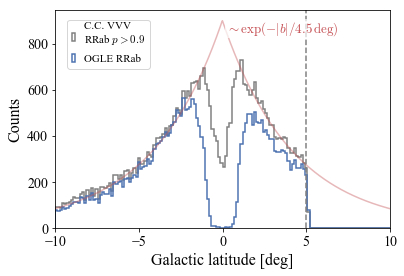

In [16]:
import seaborn as sns
vertical_density_plot()

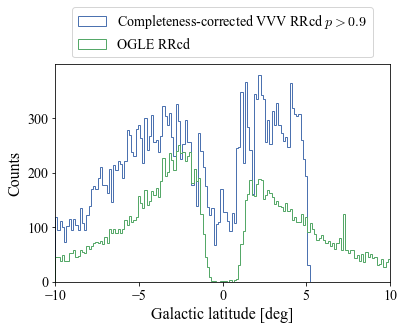

In [17]:
pcut = 0.5
fltr = ((d2d_ogle.arcsec<0.4)
                 &((ogle4_rrl['type']=='RRc')
#                    |(ogle4_rrl['type']=='RRd')
                  )
                 &(vvv_rrl['class'].values[idx_ogle]=='RRcd')
                 &(ogle4_v_match['sourceid']>0)&(vvv_rrl['prob'].values[idx_ogle]>pcut))
bbb = np.nanpercentile(ogle4_v_match['ks_b_ivw_mean_mag'].values[fltr],
                           np.linspace(0.,100.,50))
nn2,bb2=np.histogram(ogle4_v_match['ks_b_ivw_mean_mag'].values[fltr],range=[11,18],
         bins=bbb);

fltr = (ogle4_v_match['sourceid']>0)\
                &((ogle4_rrl['type']=='RRc')
#                   |(ogle4_rrl['type']=='RRd')
                 )
nn,bb=np.histogram(ogle4_v_match['ks_b_ivw_mean_mag'].values[fltr],
         range=[11,18],
         bins=bbb);
incomplete_rrc = .5*(bb[1:]+bb[:-1]),nn2/nn

fltr = (vvv_rrl['class']=='RRcd')&(vvv_rrl['prob']>pcut)&((vvv_rrl['l']<10)|(vvv_rrl['l']>350.))
plt.hist(vvv_rrl['b'][fltr],bins=150,range=[-10,10],histtype='step',
        weights=1./np.interp(vvv_rrl['ks_ivw_mean_mag'][fltr],
                             incomplete_rrc[0],incomplete_rrc[1]),
        label='Completeness-corrected VVV RRcd $p>0.9$');


fltr = ((ogle4_rrl['type']=='RRc')
#         |(ogle4_rrl['type']=='RRd')
       )&(
    (ogle_skycoord.l.deg<10.)|(ogle_skycoord.l.deg>350.))&(ogle_skycoord.b.deg>-10.)&(ogle_skycoord.b.deg<10.)
plt.hist(ogle_skycoord.b.deg[fltr],bins=150,range=[-10,10],histtype='step',
        label='OGLE RRcd');
# plt.hist(ogle_skycoord.b.deg[fltr&(ogle4_v_match['sourceid_1']>0)],
#          bins=150,range=[-10,5],histtype='step');
plt.xlim(-10,10)
plt.xlabel(r'Galactic latitude [deg]')
plt.ylabel('Counts')
plt.legend(loc='lower center',bbox_to_anchor=(0.5,1.))

In [18]:
def prob_transform(p):
    return np.log10(1-p)

In [87]:
tm = pd.read_pickle('rrab_misclass.pkl')
tmprob=pd.DataFrame(sqlutilpy.get('''select sourceid,prob,lsq_period from jason_sanders.virac2_variables where sourceid in (%s)'''%(
    ','.join([str(s) for s in tm['sourceid']])),**config.wsdb_kwargs))
tmprob = pd.merge(tm, tmprob, on='sourceid')

def misclass_panel():
    ogle_match = (d2d.arcsec<0.4)&(ogle4_rrl['type'].values[idx]=='RRab')
    xrange = [-3,0]
    nn,bb=np.histogram(prob_transform(vvv_rrl['prob'])[ogle_match],bins=50,range=xrange);

    nn2,bb=np.histogram(prob_transform(vvv_rrl['prob'])[ogle_match
                        &(vvv_rrl['class']!='RRab')],bins=50,range=xrange);

    plt.plot(.5*(bb[1:]+bb[:-1]),np.log10(np.cumsum(nn2)/np.cumsum(nn)),'o-',ms=2,label='RRab',
            color=sns.color_palette('Set2')[0])

    ogle_match = (d2d.arcsec<0.4)&((ogle4_rrl['type'].values[idx]=='RRc')|(ogle4_rrl['type'].values[idx]=='RRd'))
    xrange = [-3,0]
    nn,bb=np.histogram(prob_transform(vvv_rrl['prob'])[ogle_match],bins=50,range=xrange);

    nn2,bb=np.histogram(prob_transform(vvv_rrl['prob'])[ogle_match
                        &(vvv_rrl['class']!='RRcd')],bins=50,range=xrange);

    plt.plot(.5*(bb[1:]+bb[:-1]),np.log10(np.cumsum(nn2)/np.cumsum(nn)),'s-',ms=3,label='RRcd',
            color=sns.color_palette('Set2')[1])

    
    n,b=np.histogram(np.log10(1-tmprob['prob'].values[tm['contam_label']!='rrab']),bins=150,range=[-5,0]);
    n2,b=np.histogram(np.log10(1-tmprob['prob'].values),bins=150,range=[-5,0]);
    plt.plot(.5*(b[1:]+b[:-1]),np.log10(np.cumsum(n)/np.cumsum(1.*n2)),
             color='gray',alpha=0.5,label='RRab By-Eye',ls=((0,(6,1))))
    
    plt.xlabel(r'$\log_{10}(1-$Class. prob. $[p])$')
    plt.ylabel('Misclassification rate for prob.$>p$')
    plt.axvline(prob_transform(0.9),color='gray',ls='dashed')
    plt.xlim(-3,0)

In [244]:
import seaborn as sns

In [83]:
def completeness_panel(fld,show_legend=True):
    fltr = (ogle4_v_match['sourceid']>0)
    # fltr = ((ogle_skycoord.l.deg<10.)|(ogle_skycoord.l.deg>350.))&(ogle_skycoord.b.deg>-10.)&(ogle_skycoord.b.deg<5.)
    fltr &= ((d2d_ogle.arcsec<0.4)
                     &(ogle4_rrl['type']=='RRab')
                     &(vvv_rrl['class'].values[idx_ogle]=='RRab'))
    bbb = np.nanpercentile(ogle4_v_match[fld].values[fltr],
                               np.linspace(0.,100.,100))
    nn2,bb2=np.histogram(ogle4_v_match[fld].values[fltr],
             bins=bbb);

    fltr = (ogle4_v_match['sourceid']>0)
    # fltr = ((ogle_skycoord.l.deg<10.)|(ogle_skycoord.l.deg>350.))&(ogle_skycoord.b.deg>-10.)&(ogle_skycoord.b.deg<5.)
    fltr &= (ogle4_rrl['type']=='RRab')
    nn,bb=np.histogram(ogle4_v_match[fld].values[fltr],
             bins=bbb);

    plt.plot(.5*(bb[1:]+bb[:-1]),nn2/nn,'o-',ms=2,label='RRab',
            color=sns.color_palette('Set2')[0])
    plt.ylim(0.,1.)
    incomplete_full = .5*(bb[1:]+bb[:-1]),nn2/nn

    fltr = (ogle4_v_match['sourceid']>0)
    # fltr = ((ogle_skycoord.l.deg<10.)|(ogle_skycoord.l.deg>350.))&(ogle_skycoord.b.deg>-10.)&(ogle_skycoord.b.deg<5.)
    fltr &= ((d2d_ogle.arcsec<0.4)
                     &(ogle4_rrl['type']=='RRab')
                     &(vvv_rrl['class'].values[idx_ogle]=='RRab')
                     &(vvv_rrl['prob'].values[idx_ogle]>0.9))
    bbb = np.nanpercentile(ogle4_v_match[fld].values[fltr],
                               np.linspace(0.,100.,100))
    nn2,bb2=np.histogram(ogle4_v_match[fld].values[fltr],
             bins=bbb);

    fltr = (ogle4_v_match['sourceid']>0)
    # fltr = ((ogle_skycoord.l.deg<10.)|(ogle_skycoord.l.deg>350.))&(ogle_skycoord.b.deg>-10.)&(ogle_skycoord.b.deg<5.)
    fltr &= (ogle4_rrl['type']=='RRab')
    nn,bb=np.histogram(ogle4_v_match[fld].values[fltr],
             bins=bbb);
    incomplete = .5*(bb[1:]+bb[:-1]),nn2/nn
    plt.plot(.5*(bb[1:]+bb[:-1]),nn2/nn,'o-',ms=2,label='RRab $p>0.9$',
            color=sns.color_palette('Set2')[0],ls='dashed')
    plt.ylim(0.,1.)

    fltr = ((d2d_ogle.arcsec<0.4)
                     &((ogle4_rrl['type']=='RRc')|(ogle4_rrl['type']=='RRd'))
                     &(vvv_rrl['class'].values[idx_ogle]=='RRcd')
                     &(ogle4_v_match['sourceid']>0))
    bbb = np.nanpercentile(ogle4_v_match[fld].values[fltr],
                               np.linspace(0.,100.,50))
    nn2,bb2=np.histogram(ogle4_v_match[fld].values[fltr],
             bins=bbb);

    fltr = (ogle4_v_match['sourceid']>0)\
                    &((ogle4_rrl['type']=='RRc')|(ogle4_rrl['type']=='RRd'))
    nn,bb=np.histogram(ogle4_v_match[fld].values[fltr],
             bins=bbb);

    plt.plot(.5*(bb[1:]+bb[:-1]),nn2/nn,'s-',ms=3,label='RRcd',
            color=sns.color_palette('Set2')[1])
    plt.ylim(0.,1.)


    fltr = ((d2d_ogle.arcsec<0.4)
                     &((ogle4_rrl['type']=='RRc')|(ogle4_rrl['type']=='RRd'))
                     &(vvv_rrl['class'].values[idx_ogle]=='RRcd')
                     &(ogle4_v_match['sourceid']>0)&(vvv_rrl['prob'].values[idx_ogle]>0.9))
    bbb = np.nanpercentile(ogle4_v_match[fld].values[fltr],
                               np.linspace(0.,100.,50))
    nn2,bb2=np.histogram(ogle4_v_match[fld].values[fltr],
             bins=bbb);

    fltr = (ogle4_v_match['sourceid']>0)\
                    &((ogle4_rrl['type']=='RRc')|(ogle4_rrl['type']=='RRd'))
    nn,bb=np.histogram(ogle4_v_match[fld].values[fltr],
             bins=bbb);
    incomplete_rrc = .5*(bb[1:]+bb[:-1]),nn2/nn

    plt.plot(.5*(bb[1:]+bb[:-1]),nn2/nn,'s-',ms=3,label='RRcd $p>0.9$',
            color=sns.color_palette('Set2')[1],ls='dashed')
    plt.ylim(0.,1.)

    plt.ylabel('Completeness wrt OGLE-4')
    if show_legend:
        plt.legend(handlelength=1.2,ncol=2,bbox_to_anchor=(0.5,1),loc='lower center')

/data/jls/python3.5/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/data/jls/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/data/jls/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide
/data/jls/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide
/data/jls/python3.5/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in true_divide
/data/jls/python3.5/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in true_divide
/data/jls/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in true_divide


Text(0.5, 0, 'Number of $K_s$ detections')

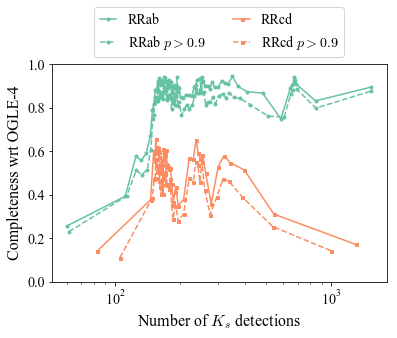

In [81]:
completeness_panel('ks_n_detections')
plt.semilogx()
# plt.xlim(12.,17.)
plt.xlabel(r'Number of $K_s$ detections')

Text(0.5, 0, '$K_s$ [mag]')

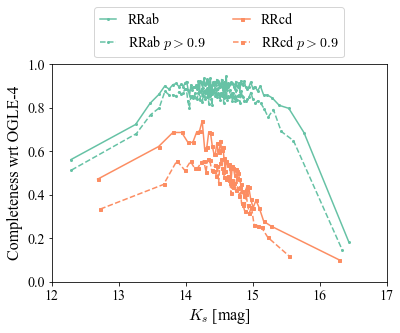

In [84]:
completeness_panel('ks_ivw_mean_mag')
plt.xlim(12.,17.)
plt.xlabel(r'$K_s$ [mag]')

/data/jls/python3.5/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/data/jls/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/data/jls/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide
/data/jls/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide
/data/jls/python3.5/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in true_divide
/data/jls/python3.5/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in true_divide
/data/jls/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in true_divide
/data/jls/python3.5/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/data/jls/python3.5/site-packages/ipykernel_launcher.py:24: Runtim

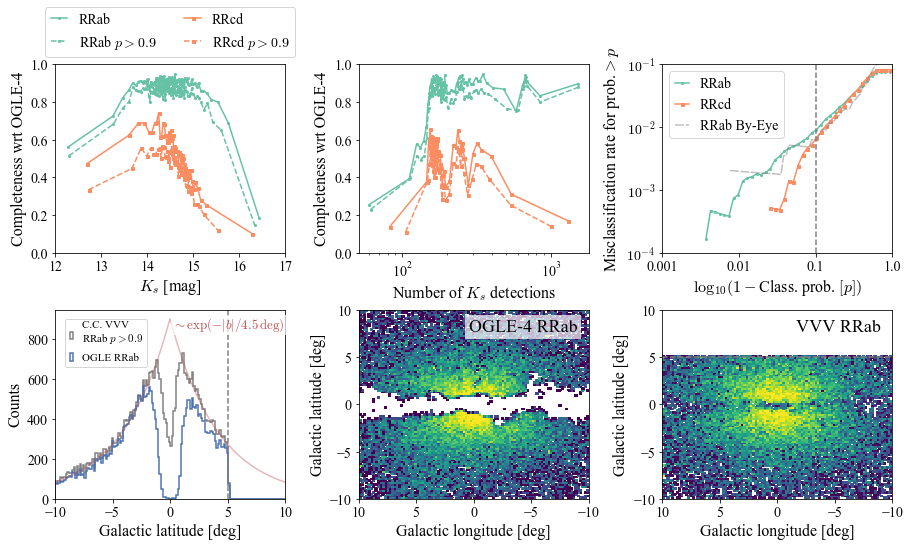

In [92]:
f,a=plt.subplots(2,3,figsize=[15.,8.])
a = a.flatten()
plt.subplots_adjust(wspace=0.32,hspace=0.3)
plt.sca(a[0])
completeness_panel('ks_ivw_mean_mag')
plt.xlim(12.,17.)
plt.xlabel(r'$K_s$ [mag]')

plt.sca(a[1])
completeness_panel('ks_n_detections',show_legend=False)
plt.semilogx()
# plt.xlim(12.,17.)
plt.xlabel(r'Number of $K_s$ detections')

plt.sca(a[2])
misclass_panel()
plt.xticks(np.log10(np.array([0.001,0.01,0.1,1.])),np.array([0.001,0.01,0.1,1.]))
plt.yticks(np.log10(np.array([0.0001,0.001,0.01,0.1])),['$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$'])
plt.ylim(-4,-1)
plt.legend(handlelength=1)
plt.sca(a[3])
vertical_density_plot()

plt.sca(a[4])
fltr = (ogle4_rrl['type']=='RRab')
# fltr &= (ogle4_v_match['ks_b_ivw_mean_mag']<16.)

plt.hist2d((ogle_skycoord.l.deg-360.*(ogle_skycoord.l.deg>180.))[fltr], 
           ogle_skycoord.b.deg[fltr], range=[[-10,10],[-10,10]],
           bins=100,vmax=25,norm=LogNorm())
plt.gca().invert_xaxis()

plt.xlabel('Galactic longitude [deg]')
plt.ylabel('Galactic latitude [deg]')

t=plt.annotate('OGLE-4 RRab', xy=(0.95,0.95), fontsize=18, ha='right', va='top',xycoords='axes fraction')
t.set_bbox({'facecolor':'white', 'alpha':0.7,'edgecolor':'None'})
plt.sca(a[5])

pcut=0.9
fltr = (ogle4_v_match['sourceid']>0)
# fltr = ((ogle_skycoord.l.deg<10.)|(ogle_skycoord.l.deg>350.))&(ogle_skycoord.b.deg>-10.)&(ogle_skycoord.b.deg<5.)
fltr &= ((d2d_ogle.arcsec<0.4)
                 &(ogle4_rrl['type']=='RRab')
                 &(vvv_rrl['class'].values[idx_ogle]=='RRab')
                 &(vvv_rrl['prob'].values[idx_ogle]>pcut))
bbb = np.nanpercentile(ogle4_v_match['ks_b_ivw_mean_mag'].values[fltr],
                           np.linspace(0.,100.,100))
nn2,bb2=np.histogram(ogle4_v_match['ks_b_ivw_mean_mag'].values[fltr],range=[11,18],
         bins=bbb);

fltr = (ogle4_v_match['sourceid']>0)
# fltr = ((ogle_skycoord.l.deg<10.)|(ogle_skycoord.l.deg>350.))&(ogle_skycoord.b.deg>-10.)&(ogle_skycoord.b.deg<5.)
fltr &= (ogle4_rrl['type']=='RRab')
nn,bb=np.histogram(ogle4_v_match['ks_b_ivw_mean_mag'].values[fltr],
         range=[11,18],
         bins=bbb);
incomplete = .5*(bb[1:]+bb[:-1]),nn2/nn

fltr = (vvv_rrl['prob']>0.9)&(vvv_rrl['class']=='RRab')
fltr &= (vvv_rrl['ks_ivw_mean_mag']<16.)
plt.hist2d((vvv_rrl['l']-360.*(vvv_rrl['l']>180.))[fltr], 
           vvv_rrl['b'][fltr], range=[[-10,10],[-10,10]],
           bins=100,vmax=25,norm=LogNorm(),
           weights=1./np.interp(vvv_rrl['ks_ivw_mean_mag'][fltr],
                             incomplete[0],incomplete[1]))
plt.gca().invert_xaxis()
plt.axhline(5.,color='gray',ls='dashed')

plt.xlabel('Galactic longitude [deg]')
plt.ylabel('Galactic latitude [deg]')
plt.annotate('VVV RRab', xy=(0.95,0.95), fontsize=18, ha='right', va='top',xycoords='axes fraction')

plt.savefig('completeness_wrt_ogle4.pdf',bbox_inches='tight')

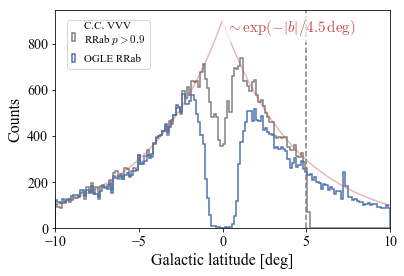

In [508]:
vertical_density_plot()
t=plt.annotate(r'$\sim\exp(-|b|/4.5\,\mathrm{deg})$',xy=(0.2,850),fontsize=15,color=sns.color_palette()[2])
t.set_bbox({'facecolor':'white', 'alpha':0.7,'edgecolor':'None'})

In [47]:
len(tm)

1000

In [53]:
np.unique(tm['contam_label'].values)

array(['contam', 'likely contam', 'rrab'], dtype=object)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/data/jls/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
/data/jls/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/data/jls/python3.5/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10


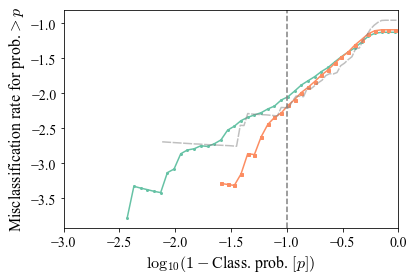

In [89]:
misclass_panel()

pppp = np.genfromtxt('mis_class.dat')

# plt.plot(pppp[:,0],np.log10(pppp[:,1]),color='gray',alpha=0.5,label='RRab By-Eye')

# n,b=np.histogram(np.log10(1-tmprob['prob'].values[tm['contam_label']!='rrab']),bins=150,range=[-5,0]);
# n2,b=np.histogram(np.log10(1-tmprob['prob'].values),bins=150,range=[-5,0]);
# plt.plot(.5*(b[1:]+b[:-1]),np.log10(np.cumsum(n)/np.cumsum(1.*n2)))

In [594]:
import sys
sys.path.append('../')
from fine_classif.feat_extract.compute_feats import correct_to_HJD, fourier_poly_chi2_fit_full, \
    retrieve_fourier_poly, LombScargle
from fine_classif.feat_extract.compute_feats import sigclipper, \
optimum_regularization, check_significant_second_minimum, find_phase_of_minimum

In [600]:
def plot_lc_sid(sid,ra,dec,per,nterms,ax=None,reg=True):
    lc=get_lightcurve(sid)
    clean = (lc['filterid']==5)&(lc['ambiguous_match']==0)&(lc['ast_res_chisq']<13.)&(lc['chi']<5.)
    lc = sigclipper(lc[clean])

    correct_to_HJD(lc,
                 ra,
                 dec)

    tt = lc['HJD'].values[np.argmin(np.abs(lc['mag'].values-np.nanpercentile(lc['mag'],98.)))]

    model = LombScargle(lc['HJD'].values-tt, lc['mag'].values, 
                        lc['emag'].values, normalization='standard')
    freq, power = model.autopower(maximum_frequency=10.)

    if ax is None:
        f,ax=plt.subplots(2,1,figsize=[5.,5.5],gridspec_kw={'height_ratios':[1.,0.3]})
    plt.sca(ax[0])
    plt.errorbar((((lc['HJD'].values-tt)%(2.*per))/per),
                 lc['mag'].values,
                 yerr=lc['emag'].values,fmt='o',color='gray',mew=0.5,mec='k')
#     plt.ylim(np.nanmean(lc['mag'].values)-0.3,np.nanmean(lc['mag'].values)+0.3)
    plt.gca().invert_yaxis()
    plt.xlim(-0.1,2.1)
    # plt.ylim(-0.5,0.5)
    plt.xlabel('Phase')
    plt.ylabel(r'$K_s$ [mag]')
#     nterms=combo_dset['lsq_nterms'].values[fltr][ii]
    opt_reg=0
    if reg:
        opt_reg=optimum_regularization(lc['mag'].values, lc['emag'].values)
    print(opt_reg)
    results_d = fourier_poly_chi2_fit_full(
                                             times=lc['HJD'].values-tt,
                                             mag=lc['mag'].values,
                                             err=lc['emag'].values,
                                             freq_dict={'freq_grid':np.array([1./per])},
                                             nterms=np.int64(nterms),
                                             npoly=2,
                                             regularization=opt_reg,
                                             time_zeropoint_poly=0.,
                                             regularize_by_trace = True,
                                             check_multiples=False, 
                                             use_power_of_2=False,
                                             return_period_error=False)
    print(find_phase_of_minimum(results_d))
    print(check_significant_second_minimum(results_d, 
                                          find_phase_of_minimum(results_d)))

    xx=np.linspace(-0.1*per,2.1*per,1000)
    FF = retrieve_fourier_poly(xx,
                               results_d)
    plt.plot(xx/per, FF,color='#FFA500',lw=3)

    plt.sca(ax[1])
    plt.plot(1./freq,power,color='#FFA500',lw=0.6)
    plt.xlim(np.max([per*0.2,0.1]),per*5.)
    plt.semilogx()

    plt.gca().xaxis.set_major_locator(LogLocator(subs=(0.5,1.,2.)))
    plt.gca().xaxis.set_major_formatter(ScalarFormatter())

    plt.axvline(per,color='gray',ls='dashed',alpha=0.5,lw=3,zorder=-10)
    plt.axvline(per/2.,color='gray',ls='dashed',alpha=0.2,lw=3,zorder=-10)

    plt.annotate('Period=%0.4f days'%per,xy=(0.98,0.95),ha='right',va='top',xycoords='axes fraction',
                fontsize=15)
    
    plt.xlabel('Period [days]')
    plt.ylabel('LS Power')
    plt.ylim(0.,)
    plt.subplots_adjust(hspace=0.32)
    return results_d


def get_lightcurve(sourceid):

    lcs = pd.DataFrame(sqlutilpy.get('''
                                select sourceid, 
                                unnest(mjdobs) as mjdobs,
                                unnest(mag) as mag,
                                unnest(emag) as emag,
                                unnest(filterid) as filterid,
                                unnest(chi) as chi,
                                unnest(ast_res_chisq) as ast_res_chisq,
                                unnest(ambiguous_match) as ambiguous_match  
                                from leigh_smith.virac2_ts_tmolnar_train_zyjhk where sourceid={0}'''.format(sourceid),
                     **config.wsdb_kwargs))
    
    if len(lcs)==0:

        lcs = pd.DataFrame(sqlutilpy.get('''
                                    select sourceid, 
                                    unnest(mjdobs) as mjdobs,
                                    unnest(mag) as mag,
                                    unnest(emag) as emag,
                                    unnest(filterid) as filterid,
                                    unnest(chi) as chi,
                                    unnest(ast_res_chisq) as ast_res_chisq,
                                    unnest(ambiguous_match) as ambiguous_match  
                                    from leigh_smith.virac2_ts_tmolnar_variables where sourceid={0}'''.format(sourceid),
                         **config.wsdb_kwargs))
    
    return lcs


In [607]:
tmprob['sourceid'].values[tmprob['contam_label']=='contam'][0]

10089390009224

In [676]:
len(np.argsort(tmprob['prob'].values[(tmprob['contam_label']=='contam')&(tmprob['prob']>0.9)])[::-1][:100])

28

8746024004816
0.005121100022657411
0.978978978978979
False


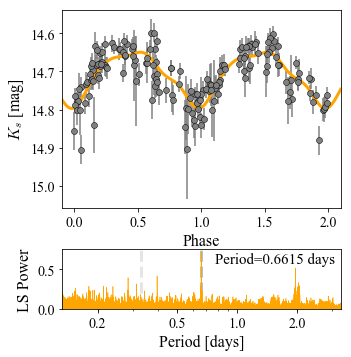

In [691]:
from matplotlib.ticker import LogLocator, ScalarFormatter
ii=16
print(tmprob['sourceid'].values[(tmprob['contam_label']=='contam')&(tmprob['prob']>0.9)][ii])
plot_lc_sid(tmprob['sourceid'].values[(tmprob['contam_label']=='contam')&(tmprob['prob']>0.9)][ii],0.,0.,
            tmprob['lsq_period'].values[(tmprob['contam_label']=='contam')&(tmprob['prob']>0.9)][ii],4);

9782338003699
0.0027766585433890594
0.9529529529529529
False


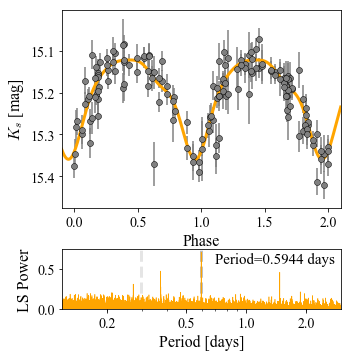

In [692]:
from matplotlib.ticker import LogLocator, ScalarFormatter
ii=5
print(tmprob['sourceid'].values[(tmprob['contam_label']=='contam')&(tmprob['prob']>0.9)][ii])

plot_lc_sid(tmprob['sourceid'].values[(tmprob['contam_label']=='contam')&(tmprob['prob']>0.9)][ii],0.,0.,
            tmprob['lsq_period'].values[(tmprob['contam_label']=='contam')&(tmprob['prob']>0.9)][ii],4);

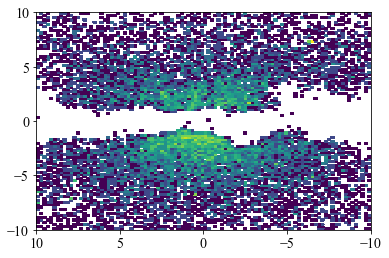

In [695]:
fltr = (ogle4_rrl['type']=='RRc')|(ogle4_rrl['type']=='RRd')

plt.hist2d((ogle_skycoord.l.deg-360.*(ogle_skycoord.l.deg>180.))[fltr], 
           ogle_skycoord.b.deg[fltr], range=[[-10,10],[-10,10]],
           bins=100,vmax=25,norm=LogNorm())
plt.gca().invert_xaxis()

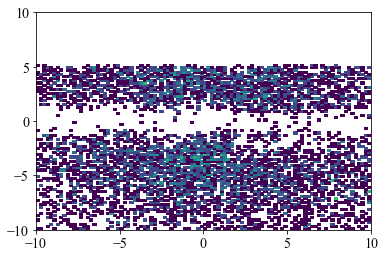

In [698]:
fltr = (vvv_rrl['prob']>0.9)&(vvv_rrl['class']=='RRcd')
plt.hist2d((vvv_rrl['l']-360.*(vvv_rrl['l']>180.))[fltr], 
           vvv_rrl['b'][fltr], range=[[-10,10],[-10,10]],
           bins=100,vmax=25,norm=LogNorm());

[]

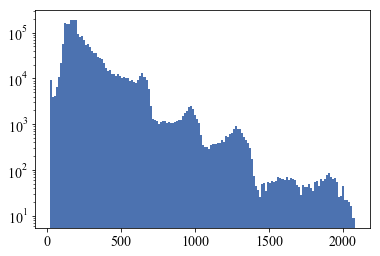

In [130]:
plt.hist(vvv_rrl['ks_n_detections'],bins=150);
plt.semilogy()

/data/jls/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


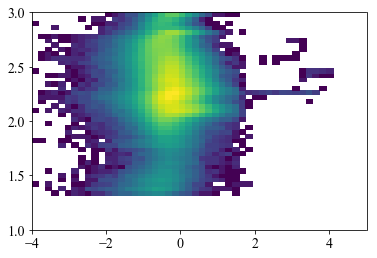

In [125]:
plt.hist2d(np.log10(vvv_rrl['ks_stetson_j']/vvv_rrl['ks_varstats_n_epochs']),
           np.log10(vvv_rrl['ks_varstats_n_epochs']),bins=50,
          range=[[-4,5],[1,3]],norm=LogNorm());

[]

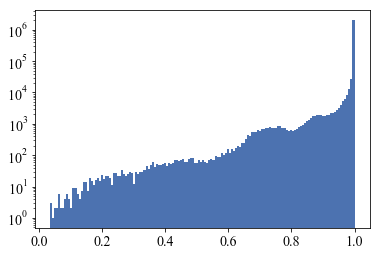

In [123]:
plt.hist(vvv_rrl['ks_varstats_n_epochs']/vvv_rrl['ks_n_detections'],bins=150);
plt.semilogy()
# plt.axvline(150.)